Total Words: 186
Vocabulary Size: 110
Training Samples: 182

Training Started...

Epoch 0  -->  Loss: 868.8492
Epoch 50  -->  Loss: 318.7320
Epoch 100  -->  Loss: 59.5299
Epoch 150  -->  Loss: 20.0700
Epoch 200  -->  Loss: 10.5734
Epoch 250  -->  Loss: 6.8639

Training Completed!

Sample Word Embeddings:

(the --> [-0.859  1.015  2.375  0.238  1.637  0.891 -3.584  3.08  -1.427  1.22 ]
2 --> [ 3.068  0.851  3.477  0.948  1.364 -0.205  1.291  1.646 -1.448  0.627]
2.5 --> [ 0.176 -0.532  2.834 -0.762  0.641 -0.148  1.934  0.025  2.157  1.68 ]
24-48 --> [-0.765 -1.671  0.799  1.012 -0.261  2.542  0.867  2.085 -1.116  0.791]
3 --> [-0.127  2.704 -2.466 -0.133  0.457  0.645  2.888  0.26   0.169  0.203]
3-5 --> [ 1.451  1.863  0.783  1.546 -1.16   2.422 -0.309 -1.109 -0.244 -0.154]
5-6 --> [ 1.225  0.597  1.42   0.893 -0.852 -0.673  0.291 -0.444  0.509  2.156]
a --> [ 2.281 -3.267 -0.348 -2.341 -2.99   2.392  0.558 -1.164  4.805  3.024]
an --> [ 0.953  0.96  -1.15  -1.092  2.015  1.635  1.864

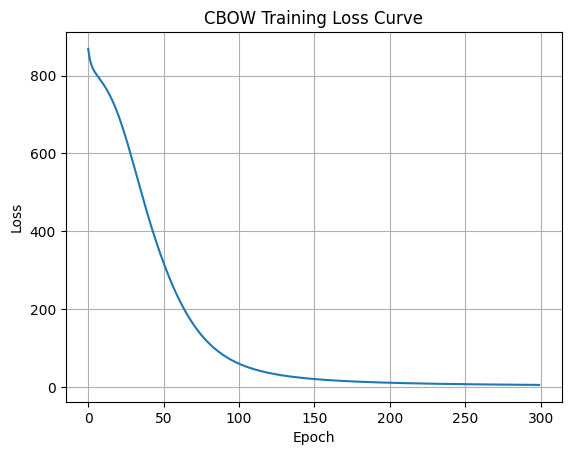

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# a. READ TEXT FILE
# ----------------------------------------------------------
file_path = "C:/Users/UMESH/OneDrive/Desktop/LP_4/CBOW(Ass5)-20251107T123932Z-1-001/CBOW(Ass5)/CBOW.txt"
with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

# Preprocessing
words = text.lower().split()
vocab = sorted(set(words))
vocab_size = len(vocab)

word_to_idx = {w: i for i, w in enumerate(vocab)}
idx_to_word = {i: w for w, i in word_to_idx.items()}

print("Total Words:", len(words))
print("Vocabulary Size:", vocab_size)


# ----------------------------------------------------------
# b. GENERATE TRAINING DATA (SIMPLE SYNTAX)
# ----------------------------------------------------------
window = 2
training_data = []

for i in range(window, len(words) - window):
    
    # 4-context words
    w1 = words[i - 2]
    w2 = words[i - 1]
    w3 = words[i + 1]
    w4 = words[i + 2]
    
    target_word = words[i]

    # One-hot vectors for context words
    v1 = np.eye(vocab_size)[word_to_idx[w1]]
    v2 = np.eye(vocab_size)[word_to_idx[w2]]
    v3 = np.eye(vocab_size)[word_to_idx[w3]]
    v4 = np.eye(vocab_size)[word_to_idx[w4]]

    # Average context vector
    context_vector = (v1 + v2 + v3 + v4) / 4

    # One-hot target word
    target_vector = np.eye(vocab_size)[word_to_idx[target_word]]

    # Add training pair
    training_data.append((context_vector, target_vector))

print("Training Samples:", len(training_data))


# ----------------------------------------------------------
# c. TRAINING THE CBOW MODEL (VERY SIMPLE VERSION)
# ----------------------------------------------------------

embedding_dim = 10
learning_rate = 0.05
epochs = 300

# Initialize weights (random values)
W1 = np.random.rand(vocab_size, embedding_dim)
W2 = np.random.rand(embedding_dim, vocab_size)

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

loss_history = []

print("\nTraining Started...\n")

for epoch in range(epochs):
    total_loss = 0

    # Go through every context-target pair
    for context_vector, target_vector in training_data:

        # -----------------------
        # 1. FORWARD PASS
        # -----------------------
        
        # Hidden layer output = context_vector * W1
        hidden_layer = np.dot(context_vector, W1)

        # Final output = softmax(hidden_layer * W2)
        output_layer = softmax(np.dot(hidden_layer, W2))

        # -----------------------
        # 2. CALCULATE LOSS
        # -----------------------
        loss = -np.sum(target_vector * np.log(output_layer + 1e-9))
        total_loss += loss

        # -----------------------
        # 3. BACKPROPAGATION
        # -----------------------

        # Error = actual - predicted
        error = target_vector - output_layer

        # Change for W2
        change_W2 = hidden_layer.reshape(-1, 1) * error

        # Change for W1
        temp = np.dot(W2, error)
        change_W1 = context_vector.reshape(-1, 1) * temp

        # -----------------------
        # 4. UPDATE WEIGHTS
        # -----------------------
        W1 += learning_rate * change_W1
        W2 += learning_rate * change_W2

    # Store loss
    loss_history.append(total_loss)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}  -->  Loss: {total_loss:.4f}")

print("\nTraining Completed!")



# ----------------------------------------------------------
# d. OUTPUT: SHOW SAMPLE WORD EMBEDDINGS
# ----------------------------------------------------------
print("\nSample Word Embeddings:\n")

for word in vocab[:10]:  # show only first 10 words
    print(word, "-->", np.round(W1[word_to_idx[word]], 3))


# ----------------------------------------------------------
# PLOT LOSS CURVE
# ----------------------------------------------------------
plt.plot(loss_history)
plt.title("CBOW Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
